# Applied Statistics - Assessment Problems

This notebook explores key statistical concepts through hands-on simulations and analyses using Python. It covers probability experiments, sampling distributions, t-tests, type II errors, and ANOVA, with a focus on hypothesis testing and data interpretation. The exercises demonstrate how to apply statistical reasoning, visualize data, and compare methods for analyzing group differences.

*****
## Problem 1: Extending the Lady Tasting Tea

In this problem, we extend the classic Lady Tasting Tea experiment by increasing the number of cups from 8 (4 tea-first, 4 milk-first) to 12 (8 tea-first, 4 milk-first) and estimates the probability of correctly identifying all cups by chance using NumPy simulations. The results are compared to the original 8-cup experiment to interpret extreme outcomes and discuss potential adjustments to the p-value threshold.

The problem is divided into five parts for a step-by-step analysis:
- Libraries: All libraries requeried for the problem.
- Part A: Original Tea Experiment (8 Cups of Tea).
- Part B: Extended Tea Experiment (12 Cups of Tea).
- Part C: Comparing Original Tea Experiment vs. Extended Tea Experiment
- Conclusion: Interpretation of results and discussion of implications for statistical significance.


####  - Libraries:

In [48]:
# Numerical structures and operations.
import numpy as np
# Reference: https://numpy.org/doc/stable/reference/index.html#reference

# Mathematical functions from the standard library.
import math
# Reference: https://docs.python.org/3/library/math.html

# Plotting.
import matplotlib.pyplot as plt
# Reference: https://matplotlib.org/stable/contents.html

# Random selections.
import random
# Reference: https://docs.python.org/3/library/random.html

#### - Part A: Original Tea Experiment (8 Cups of Tea)

The original Lady Tasting Tea experiment was designed to test a lady's claim that she could distinguish whether milk or tea was added first to a cup. The experiment used 8 Cups of Tea: 4 prepared with milk first and 4 prepared with tea first. The cups were presented to the participant in a random order, and she was asked to classify them correctly.

- Experiment calculation:

In this calculation, we will determine the number of possible combinations where the order of selection does not matter, no element is chosen more than once, and the probability of the lady correctly selecting 4 Cups of Tea.

In [49]:
# Number of cups of tea in total.
no_cups = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 4

Calculating the number of ways to choose *\(k\)* elements from a set of *\(n\)* elements, where the order does not matter and no element is selected more than once.

In [50]:
# Number of possible combinations.
comb = math.comb(no_cups, no_cups_milk_first) # Reference: https://docs.python.org/3/library/math.html#math.comb

# Show the result.
print ("The number of possible combinations is:", comb)

The number of possible combinations is: 70


The number of possible combinations is:

$$C(n, k) = \binom{8}{4} = 70 \text{ combinations}$$

Calculating the probability of correctly selecting for the Original Tea Experiment (8 Cups of Tea).

In [59]:
# Probability of the four correct cups.
prob = 1 / comb

# Show the result.
print('Probability of correctly identifying the Original Tea Experiment (8 Cups of Tea) is:', prob)

Probability of correctly identifying the Original Tea Experiment (8 Cups of Tea) is: 0.014285714285714285


The probability of correctly selecting the Original Tea Experiment (8 Cups of Tea) by chance is:

$$
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
$$

This shows that the probability of guessing all cups correctly by chance is very low.

- Simulation using NumPy:

To verify the theoretical probability, we simulate the Lady Tasting Tea experiment using NumPy. In this setup, the 8 cups are represented as an array with:

- **0** for cups of tea with milk in first (4 cups).
- **1** for cups of tea with tea in first (4 cups).

In [52]:
# Number of cups of tea in total: 4 cups of tea with milk in first (0) and 4 cups of tea with tea in first (1).
cups_8 = np.array([1]*4 + [0]*4)

The steps of the simulation are:

1. Randomly shuffle the cups to simulate a random presentation.
2. The participant randomly selects 4 cups, representing a guess made by chance.
3. We check whether all 4 selected cups are tea-first (i.e., the sum of the selected cups equals 4).
4. Repeat this process a large number of times (150,000 simulations).
5. Estimate the probability by:

$$
\text{Estimated Probability} = \frac{\text{Number of Successful Trials}}{\text{Total Number of Trials}}
$$

In [53]:
# Number of simulation trials.
trials = 150000
successes = 0

# Simulation:

for _ in range(trials): # Reference: https://www.geeksforgeeks.org/python/python-range-function/
    # Randomize the order of the cups.
    np.random.shuffle(cups_8) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
    
    # Participant randomly selects 4 cups (guessing).
    guess_indices = np.random.choice(range(8), size=4, replace=False)
    guessed_cups = cups_8[guess_indices]
    
    # Check if all 4 selected cups are tea-first (sum == 4).
    if np.sum(guessed_cups) == 4:
        successes += 1

# Probability Estimate:

simulated_probability = successes / trials
print("Estimated probability from simulation:", simulated_probability)


Estimated probability from simulation: 0.014133333333333333


This provides an empirical approximation of the probability of correctly identifying all 4 tea-first cups purely by chance.  
The simulated probability should be close to the theoretical value:

$$
P = \frac{1}{70} \approx 0.0143
$$

This confirms that correctly identifying all cups is highly unlikely under random guessing.

#### - Part B: Extended Tea Experiment (12 Cups of Tea)

In this part, we extend the classic Lady Tasting Tea experiment by increasing the total number of cups from 8 to 12, with 8 cups prepared with tea first and 4 cups prepared with milk first. This extension allows us to explore how increasing the number of cups affects the likelihood of extreme outcomes and the interpretation of statistical significance. By simulating the experiment multiple times, we can empirically approximate the probability and compare it with the theoretical expectations.

- Experiment calculation:

In this calculation, we determine the number of possible combinations when selecting the 8 tea-first cups out of the 12 total cups. As before, the order of selection does not matter and no element is chosen more than once. We then compute the probability that the participant correctly identifies all 8 tea-first cups purely by chance.

In [54]:
# Number of cups of tea in total.
no_cups_ext = 12

# Number of cups of tea with milk in first.
no_cups_milk_first_ext = 4

# Number of cups of tea with tea in first.
no_cups_tea_first_ext = 8

Calculating the number of ways to choose *\(k\)* elements from a set of *\(n\)* elements, where the order does not matter and no element is selected more than once.

In [55]:
# Number of possible combinations.
comb_ext = math.comb(no_cups_ext, no_cups_milk_first_ext) # Reference: https://docs.python.org/3/library/math.html#math.comb

# Show the result.
print ("The number of possible combinations is:", comb_ext)

The number of possible combinations is: 495


The number of possible combinations is:

$$C(n, k) = \binom{12}{4} = 495 \text{ combinations}$$

Calculating the probability of correctly selecting for the Extended Tea Experiment (12 Cups of Tea).

In [56]:
# Probability of the Extended Tea Experiment (12 Cups of Tea).
prob_ext = 1 / comb_ext

# Show the result.
print('Probability of correctly identifying for the Extended Tea Experiment (12 Cups of Tea) is:', prob_ext)

Probability of correctly identifying for the Extended Tea Experiment (12 Cups of Tea) is: 0.00202020202020202


The probability of correctly selecting the Extended Tea Experiment (12 Cups of Tea)
$$
P = \frac{1}{\binom{12}{4}} = \frac{1}{495} \approx 0.0020
$$

This confirms that correctly identifying all cups is highly unlikely under random guessing.

- Simulation using NumPy:

To extend the original Lady Tasting Tea experiment, we now consider 12 cups instead of 8, consisting of:
- **0** for cups of tea with milk in first (4 cups).
- **1** for cups of tea with tea in first (4 cups).

In [57]:
# Number of cups of tea in total: 8 cups of tea with tea in first (1), 4 cups of tea with milk in first (0).
cups_12 = np.array([1]*8 + [0]*4)


The participant claims to correctly identify all tea-first cups.  
To estimate the probability of achieving this purely by chance, we simulate the experiment using NumPy.

The simulation follows these steps:
  
1. Randomly shuffle the array to simulate a random presentation order.  
2. The participant “guesses” by randomly selecting 8 cups, attempting to identify all tea-first cups.  
3. A trial is counted as a success only if all selected cups are tea-first (i.e., their sum equals 8).  
4. Repeat the experiment over 150,000 trials to obtain a stable estimate.  
5. Estimate the probability by:

$$
\text{Estimated Probability} = \frac{\text{Number of Successful Trials}}{\text{Total Number of Trials}}
$$

In [58]:
# Number of simulation trials.
trials = 150000
successes_12 = 0

# Simulation:

for _ in range(trials):
    # Randomly shuffle the cups.
    np.random.shuffle(cups_12)
    
    # Participant randomly selects 8 cups (guessing tea-first cups).
    guess_indices = np.random.choice(range(12), size=8, replace=False)
    guessed_cups = cups_12[guess_indices]
    
    # Check if all 8 selected cups are tea-first.
    if np.sum(guessed_cups) == 8:
        successes_12 += 1

# Probability Estimate:

simulated_probability_12 = successes_12 / trials
print("Estimated probability from simulation:", simulated_probability_12)

Estimated probability from simulation: 0.0020066666666666666


This provides an empirical approximation of the probability of correctly identifying all 8 tea-first cups purely by chance. The simulated probability can be compared to the theoretical value:

$$
P = \frac{1}{495} \approx 0.0020
$$

This shows that correctly identifying all cups in the Extended Tea Experiment (12 Cups of Tea) is even more unlikely under random guessing than in the Original Tea Experiment (8 Cups of Tea) design.


#### - Part C: Comparing Original Tea Experiment vs. Extended Tea Experiment

The extended 12-cup experiment makes it significantly harder to guess all cups correctly by chance. The probability drops from:

- **1 in 70** → Original Tea Experiment (8 Cups of Tea) to **1 in 495** → Extended Tea Experiment (12 Cups of Tea).

This is more than a **7-fold decrease** in chance success.

As a result, the Extended Tea Experiment (12 Cups of Tea) provides stronger evidence against random guessing and may justify using a similar or even slightly more relaxed p-value threshold, because the design itself is already far more stringent.


#### - Conclusion:

The Lady Tasting Tea experiment provides a clear illustration of how experimental design influences the strength of statistical evidence.  
In the Original Tea Experiment, the probability of correctly identifying all tea-first cups by chance is:

$$
P_{\text{8 cups}} = \frac{1}{70} \approx 0.0143
$$

Extending the experiment to  Extended Tea Experiment makes chance success even more unlikely:

$$
P_{\text{12 cups}} = \frac{1}{495} \approx 0.00202
$$

This represents a substantial reduction in the likelihood of achieving a perfect result through random guessing, more than seven times less likely than in the original design.

Because the extended experiment is naturally more stringent, it strengthens the evidence against the null hypothesis and reduces the need for an extremely strict p-value threshold. In other words, the design itself builds in stronger protection against false positives.

Overall, the simulations confirm the theoretical probabilities and demonstrate how expanding the experiment enhances its discriminatory power, making it a more robust test of the participant’s claimed ability.


*****
## Problem 2: Normal Distribution

In this problem, we investigated how sampling variability affects estimates of the standard deviation.  
We generate 100,000 samples, each of size 10, drawn from a standard normal distribution.  
For every sample we compute:

- The sample standard deviation (using `ddof = 1`)
- The population standard deviation (using `ddof = 0`)

We then plot histograms of both sets of values on the same axes to visualize the difference between the two estimators.  

This allows us to compare how biased or variable each estimator is, and to understand how the gap between them changes as sample size increases.


####  - Libraries:

In [61]:
# Numerical structures and operations.
import numpy as np
# Reference: https://numpy.org/doc/stable/reference/index.html#reference

# Plotting.
import matplotlib.pyplot as plt
# Reference: https://matplotlib.org/stable/contents.html

####  - Part A: Generate the Data

In [67]:
# Set parameters
num_samples = 100000   # number of samples
sample_size = 10        # size of each sample

# Generate samples from standard normal distribution
samples = np.random.randn(num_samples, sample_size)

# Compute SD with ddof=1 (sample SD)
sd_sample = samples.std(axis=1, ddof=1)

# Compute SD with ddof=0 (population SD)
sd_population = samples.std(axis=1, ddof=0)

samples


array([[ 0.82008247, -0.41507079, -0.23647689, ..., -0.69809252,
         1.74389853,  0.72907075],
       [ 0.31451501, -1.33110225, -0.76672728, ...,  0.68908257,
         0.80335626,  0.26837987],
       [-0.50044091,  1.84435581, -0.24676135, ..., -0.93960422,
        -0.43499358, -0.25337774],
       ...,
       [ 1.25796514, -1.23095117,  0.79855023, ...,  0.93924651,
        -0.70295057, -1.19028004],
       [-1.7612463 ,  0.57154434,  1.15404978, ...,  1.71648632,
        -0.03287186,  0.26018457],
       [ 0.19458404,  0.30358086, -1.19987798, ...,  1.32024929,
        -1.78914915, -0.44151908]])

####  - Part B: Histogram Comparison

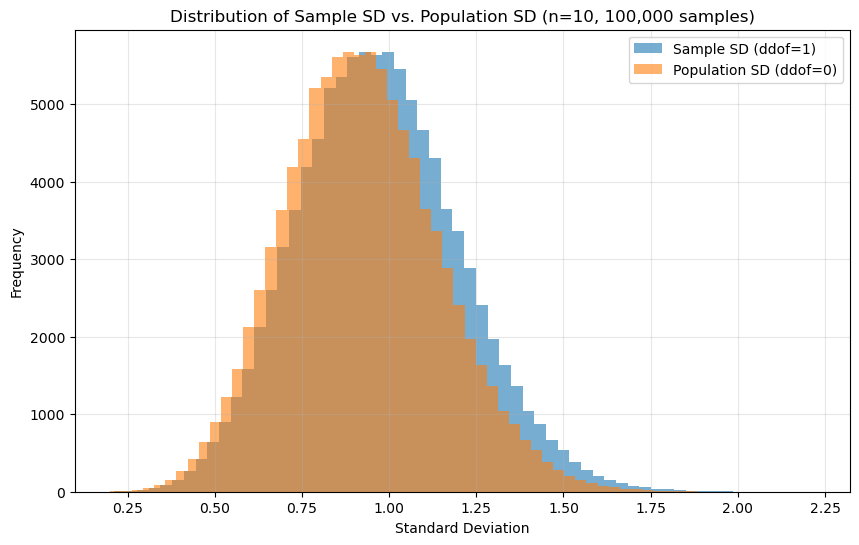

In [64]:
# Plotting the histograms
plt.figure(figsize=(10,6))
plt.hist(sd_sample, bins=60, alpha=0.6, label="Sample SD (ddof=1)")
plt.hist(sd_population, bins=60, alpha=0.6, label="Population SD (ddof=0)")

plt.title("Distribution of Sample SD vs. Population SD (n=10, 100,000 samples)")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

####  - Conclusion

dasda

*****
## Problem 3: t-Tests

fsdfsdf

*****
## Problem 4: ANOVA

dfdsfsdf

***********
# End
last commit on XX/12/2025.